In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy import stats
import datetime as dt
from datetime import timedelta
from sklearn.tree import DecisionTreeRegressor

In [2]:
SPP_path = r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)'

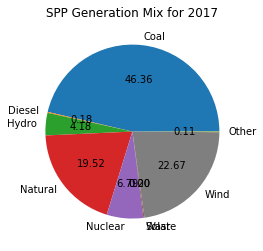

In [3]:
gen_mix = pd.read_csv(SPP_path + '\Generation Mix By Fuel Type\GenMix_2017.csv')

new = pd.DataFrame()

first = gen_mix.columns.values.tolist()[1].split(' ')[1]
new[first] = np.array([gen_mix[gen_mix.columns.values.tolist()[1]].sum()])
for element in gen_mix.columns.values.tolist()[2:]:
    if element.split(' ')[1] == first:
        new[first] = new[first] + np.array([gen_mix[element].sum()])
    else:
        new[element.split(' ')[1]] = np.array([gen_mix[element].sum()])
        first = element.split(' ')[1]

output = new.loc[0].values.tolist()[0:-1]
fuels = new.columns.values.tolist()[0:-1]

plt.pie(output,labels=fuels,autopct='%.2f')
plt.title('SPP Generation Mix for 2017')
plt.show()

In [4]:
len(output)

9

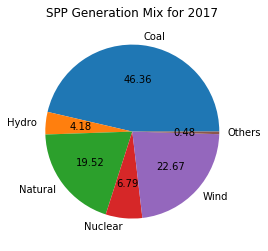

In [5]:
others = []
major_output = []
major_fuels = []
for i in range(len(output)):
    if output[i] < 10e7:
        others.append(output[i])
    else:
        major_output.append(output[i])
        major_fuels.append(fuels[i])
    
major_output.append(np.array(others).sum())
major_fuels.append('Others')

plt.pie(major_output,labels=major_fuels,autopct='%.2f')
plt.title('SPP Generation Mix for 2017')
plt.show()

In [6]:
def GMT2CT(s):
    date = s.split('T')[0]
    date = dt.datetime.strptime(date,'%Y-%m-%d').date()
    time = s.split('T')[1][:-1]
    hour = int(time.split(':')[0])
    if hour >= 6:
        hour = hour - 6
    else:
        hour = 24 + (hour - 6)
        date = date - timedelta(1)
    time = str(hour) + ':' + time.split(':')[1] + ':' + time.split(':')[2]
    time = dt.datetime.strptime(time,'%H:%M:%S').time()
    return [date, time]


In [7]:
list_intervals = gen_mix[gen_mix.columns[0]].values.tolist()
local_time = []
local_date = []
for value in list_intervals:
    local_date.append(GMT2CT(value)[0])
    local_time.append(GMT2CT(value)[1])
gen_mix['Local Date'] = np.array(local_date)
gen_mix['Local Time'] = np.array(local_time)

In [8]:
gen_mix.head()

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil,Hydro,Natural Gas,Nuclear,Solar,Waste Disposal Services,Wind,Waste Heat,Other,Average Actual Load,Local Date,Local Time
0,2017-01-01T06:00:00Z,2956.2,13385.3,0.0,251.8,3025.9,2098.4,0.0,7.7,4499.1,0.0,35.4,25380.548,2017-01-01,00:00:00
1,2017-01-01T06:05:00Z,2920.2,13342.3,0.0,241.7,2988.6,2100.8,0.0,8.1,4529.3,0.0,35.7,25356.102,2017-01-01,00:05:00
2,2017-01-01T06:10:00Z,2920.2,13254.2,0.0,241.7,2969.2,2100.8,0.0,8.1,4529.3,0.0,35.7,25356.102,2017-01-01,00:10:00
3,2017-01-01T06:15:00Z,2923.2,13380.3,0.0,267.6,2981.2,2099.1,0.0,8.1,4551.8,0.0,35.7,25358.945,2017-01-01,00:15:00
4,2017-01-01T06:20:00Z,2900.3,13388.1,0.0,276.7,2960.1,2099.8,0.0,8.7,4603.1,0.0,36.4,25345.252,2017-01-01,00:20:00


<ErrorbarContainer object of 3 artists>

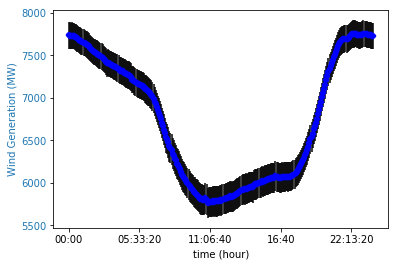

In [9]:
data1 = gen_mix.groupby('Local Time')[[' Wind']].mean()

data1['sem'] = gen_mix.groupby('Local Time')[[' Wind']].sem()

time = data1.index

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (hour)')
ax1.set_ylabel('Wind Generation (MW)', color=color)
ax1.plot(time, data1[' Wind'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.errorbar(time,data1[' Wind'], data1['sem'],
                 marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)

In [10]:
DA = pd.read_csv(r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\DA\2017\2017\LMP_SL_2017.csv')
DA.head()

,INTERVAL,GMTINTERVALEND,STLMNTLOCNAME,PNODENAME,LMP,MLC,MCC,MEC
0,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AEC,SOUC,23.6810,0.2235,-0.0405,23.4980
1,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_CSWS,CSWS_AECC_LA,24.7412,0.8705,0.3727,23.4980
2,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_ELKINS,CSWSELKINSUNELKINS_RA,25.4095,1.1575,0.7541,23.4979
3,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_FITZHUGH,CSWSFITZHUGHPLT1,25.2253,1.0222,0.7052,23.4979
4,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_FLTCREEK,CSWSFLINTCRKUN1_JOU_AECC_RA,24.7430,0.5142,0.7309,23.4979


In [11]:
DA2 = pd.read_csv(SPP_path + '\\DA\\2017\\2017\\LMP_SL_2017.csv')

In [12]:
# Iterates through every location (more granular, but slower)
DA_intervals = DA[DA.columns[0]].values.tolist()
DA_dates = []
DA_hours = []
for interval in DA_intervals:
    date = interval.split(' ')[0]
    DA_dates.append(dt.datetime.strptime(date,'%Y-%m-%d').date())
    hour = interval.split(' ')[1].split('.')[0]
    DA_hours.append(dt.datetime.strptime(hour,'%H:%M:%S').time())
DA['Local Date'] = np.array(DA_dates)
DA['Local Time'] = np.array(DA_hours)
DA.tail()

,INTERVAL,GMTINTERVALEND,STLMNTLOCNAME,PNODENAME,LMP,MLC,MCC,MEC,Local Date,Local Time
8280254,2018-01-01 00:00:00.000000,2018-01-01 06:00:00.000000,WR_MOPEP_MPS,WR_MOPEP_MPS_LA,33.0326,-1.2490,-1.3360,35.6176,2018-01-01,00:00:00
8280255,2018-01-01 00:00:00.000000,2018-01-01 06:00:00.000000,WR_MW_KPP_NITS,WR_MW_KPP_NITS_LA,32.1329,-0.8815,-2.6032,35.6176,2018-01-01,00:00:00
8280256,2018-01-01 00:00:00.000000,2018-01-01 06:00:00.000000,WR_SEG,WR_SEG_LA,27.6419,0.4486,-8.4243,35.6176,2018-01-01,00:00:00
8280257,2018-01-01 00:00:00.000000,2018-01-01 06:00:00.000000,WR_WR,WR_LA,30.4110,-1.7122,-3.4944,35.6176,2018-01-01,00:00:00
8280258,2018-01-01 00:00:00.000000,2018-01-01 06:00:00.000000,YAD,VACS,38.0955,0.9585,1.5194,35.6176,2018-01-01,00:00:00


In [13]:
# Aggregate locations
DA_aggloc = DA.groupby('GMTINTERVALEND')[['INTERVAL','LMP']].agg({'INTERVAL':'first',
                                                                  'LMP':'mean'})
DA_aggloc['loc sem'] = DA.groupby('GMTINTERVALEND')[['LMP']].sem()

In [14]:
DA_intervals = DA_aggloc[DA_aggloc.columns[0]].values.tolist()
DA_dates = []
DA_times = []
weekday = []
for interval in DA_intervals:
    date = interval.split(' ')[0]
    date = dt.datetime.strptime(date,'%Y-%m-%d').date()
    DA_dates.append(date)
    if date.weekday() < 5:
        weekday.append(True)
    else:
        weekday.append(False)
    time = interval.split(' ')[1].split('.')[0]
    time = dt.datetime.strptime(time,'%H:%M:%S').time()
    DA_times.append(time)
DA_aggloc['Local Date'] = np.array(DA_dates)
DA_aggloc['Local Time'] = np.array(DA_times)
DA_aggloc['Weekday'] = np.array(weekday)
DA_aggloc.tail()

,INTERVAL,LMP,loc sem,Local Date,Local Time,Weekday
GMTINTERVALEND,,,,,,
2018-01-01 02:00:00.000000,2017-12-31 20:00:00.000000,44.376063,0.164322,2017-12-31,20:00:00,False
2018-01-01 03:00:00.000000,2017-12-31 21:00:00.000000,43.884059,0.210470,2017-12-31,21:00:00,False
2018-01-01 04:00:00.000000,2017-12-31 22:00:00.000000,41.137268,0.174956,2017-12-31,22:00:00,False
2018-01-01 05:00:00.000000,2017-12-31 23:00:00.000000,43.236809,0.213430,2017-12-31,23:00:00,False
2018-01-01 06:00:00.000000,2018-01-01 00:00:00.000000,34.699045,0.182230,2018-01-01,00:00:00,True


<ErrorbarContainer object of 3 artists>

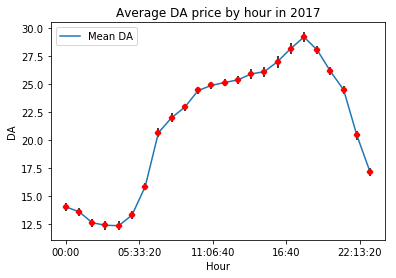

In [15]:
DA_price = DA_aggloc.groupby('Local Time')[['LMP']].mean()
DA_price['time sem'] = DA_aggloc.groupby('Local Time')[['LMP']].sem()
time_x = DA_price.index

plt.plot(time_x,DA_price['LMP'],label='Mean DA')
plt.xlabel('Hour')
plt.ylabel('DA')
plt.title('Average DA price by hour in 2017')
plt.legend(loc='best')
plt.errorbar(time_x,DA_price['LMP'], DA_price['time sem'],
             marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4)


In [16]:
def plot_dfs(df1, df2):
    
    data1 = df1.groupby('Local Time')[[' Wind']].mean()
    data2 = df2.groupby('Local Time')[['LMP']].mean()

    data1['sem'] = df1.groupby('Local Time')[[' Wind']].sem()
    data2['sem'] = df2.groupby('Local Time')[['LMP']].sem()

    time = data1.index

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time (hour)')
    ax1.set_ylabel('Wind Generation (MW)', color=color)
    ax1.plot(time, data1[' Wind'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.errorbar(time,data1[' Wind'], data1['sem'],
                     marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4, label=None)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    time = data2.index
    
    color = 'tab:blue'
    ax2.set_ylabel('Price ($/MW)', color=color)  # we already handled the x-label with ax1
    ax2.plot(time, data2['LMP'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.errorbar(time,data2['LMP'], data2['sem'],
                     marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

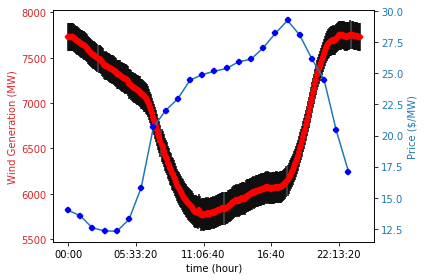

In [17]:
plot_dfs(gen_mix, DA_price)

In [18]:
def plot_dfs_seasons(gen, price):
    
    equinox1 = dt.datetime.strptime('2017-03-21','%Y-%m-%d').date()
    solstice1 = dt.datetime.strptime('2017-06-21','%Y-%m-%d').date()
    equinox2 = dt.datetime.strptime('2017-09-21','%Y-%m-%d').date()
    solstice2 = dt.datetime.strptime('2017-12-21','%Y-%m-%d').date()
    
    winter_price = price[(price['Local Date']<=equinox1)]
    spring_price = price[(price['Local Date']>=equinox1) & (price['Local Date']<=solstice1)]
    summer_price = price[(price['Local Date']>=solstice1) & (price['Local Date']<=equinox2)]
    fall_price = price[(price['Local Date']>=equinox2)]

    winter_gen = gen[(gen['Local Date']<=equinox1)]
    spring_gen = gen[(gen['Local Date']>=equinox1) & (gen['Local Date']<=solstice1)]
    summer_gen = gen[(gen['Local Date']>=solstice1) & (gen['Local Date']<=equinox2)]
    fall_gen = gen[(gen['Local Date']>=equinox2)]

    seasons_dict = {'Winter':[winter_price, winter_gen],
                    'Spring':[spring_price, spring_gen],
                    'Summer':[summer_price, summer_gen],
                    'Fall':[fall_price, fall_gen]
                   }

    for season, data in seasons_dict.items():

        data1 = data[1].groupby('Local Time')[[' Wind']].mean()
        data2 = data[0].groupby('Local Time')[['LMP']].mean()

        time = data1.index
        
        data1['sem'] = gen.groupby('Local Time')[[' Wind']].sem()
        data2['sem'] = price.groupby('Local Time')[['LMP']].sem()

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('time (hour)')
        ax1.set_ylabel('Wind Generation (MW)', color=color)
        ax1.plot(time, data1[' Wind'], color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.errorbar(time,data1[' Wind'], data1['sem'],
                         marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4, label=None)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        time = data2.index
        
        color = 'tab:blue'
        ax2.set_ylabel('Price ($/MW)', color=color)  # we already handled the x-label with ax1
        ax2.plot(time, data2['LMP'], color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.errorbar(time,data2['LMP'], data2['sem'],
                         marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)


        plt.title(season)
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.show()

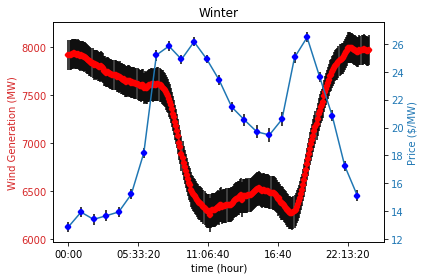

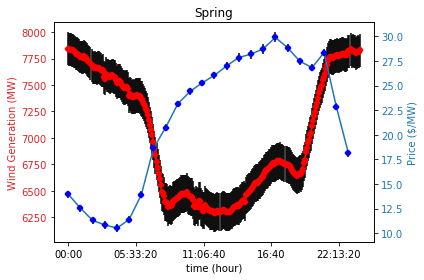

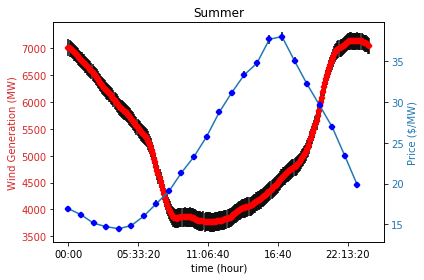

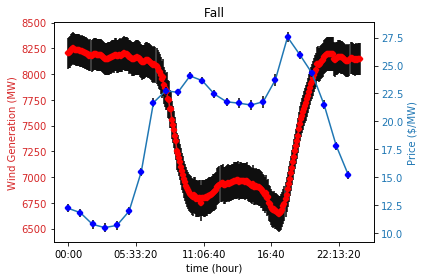

In [19]:
plot_dfs_seasons(gen_mix, DA_aggloc)

In [20]:
timespan = [str(d) for d in DA_price.index.values.tolist()]
minutes = []
for t in timespan:
    minutes.append(int(t.split(':')[0])*60)
DA_price['Minutes'] = np.array(minutes)
DA_price.head()

,LMP,time sem,Minutes
Local Time,,,
00:00:00,14.004104,0.360668,0
01:00:00,13.572501,0.361794,60
02:00:00,12.587807,0.373007,120
03:00:00,12.354799,0.379655,180
04:00:00,12.323302,0.381407,240


In [21]:
DA_price['LMP'][1:].values

array([13.57250072, 12.58780674, 12.35479873, 12.32330168, 13.26632841,
       15.82315689, 20.64862297, 22.0029209 , 22.9448658 , 24.43393355,
       24.8837028 , 25.14766748, 25.38043425, 25.91149576, 26.11583226,
       27.01658306, 28.18944807, 29.22637002, 28.0534196 , 26.14916458,
       24.47811804, 20.40385344, 17.11340397])

In [22]:
dict_ssr = {}

for i in range(24):
    try:
        x_avg = (DA_price['Minutes'][i]+DA_price['Minutes'][i+1])/2
        y_avg1 = DA_price['LMP'][0:i+1].values.mean()
        y_avg2 = DA_price['LMP'][i:].values.mean()
        ssr = ((DA_price['LMP'][0:i+1].values - y_avg1)**2).sum() + ((DA_price['LMP'][i:].values - y_avg2)**2).sum()
        dict_ssr[i] = ssr
    except:
        y_avg1 = DA_price['LMP'].values.mean()
        ssr = ((DA_price['LMP'][0:i+1].values - y_avg1)**2).sum()
        dict_ssr[i] = ssr
        
ssr_min = np.array(list(dict_ssr.values())).min()
#np.where(np.array(list(dict_ssr.values()))==ssr_min,1,0).loc

In [23]:
smallest_x = 0
smallest_y = 0
for i in range(24):
    try:
        y_avg1 = DA_price['LMP'][0:i+1].values.mean()
        y_avg2 = DA_price['LMP'][i:].values.mean()
        ssr = ((DA_price['LMP'][0:i+1].values - y_avg1)**2).sum() + ((DA_price['LMP'][i:].values - y_avg2)**2).sum()
        if i == 0:
            smallest_y = ssr
        else:
            if ssr < smallest_y:
                smallest_y = ssr
                smallest_x = i
    except:
        y_avg1 = DA_price['LMP'].values.mean()
        ssr = ((DA_price['LMP'][0:i+1].values - y_avg1)**2).sum()
        if ssr < smallest_y:
                smallest_y = ssr
                smallest_x = i
smallest_x

7

In [24]:
def ssr_split(df):
    smallest_y = 0
    smallest_x = 0
    for i in range(0, df.shape[0]):
        try:
            y_avg1 = df['LMP'][0:i+1].values.mean()
            y_avg2 = df['LMP'][i:df.shape[0]].values.mean()
            ssr = ((df['LMP'][0:i+1].values - y_avg1)**2).sum() + ((df['LMP'][i:df.shape[0]].values - y_avg2)**2).sum()
            if i == 0:
                smallest_y = ssr
            if ssr < smallest_y:
                smallest_y = ssr
                smallest_x = i
        except:
            y_avg1 = df['LMP'].values.mean()
            ssr = ((df['LMP'][0:i+1].values - y_avg1)**2).sum()
            if ssr < smallest_y:
                smallest_y = ssr
                smallest_x = i
    return [df.iloc[0:smallest_x+1],df.iloc[smallest_x+1:]]

In [25]:
split = ssr_split(DA_price)
split[0]

,LMP,time sem,Minutes
Local Time,,,
00:00:00,14.004104,0.360668,0
01:00:00,13.572501,0.361794,60
02:00:00,12.587807,0.373007,120
03:00:00,12.354799,0.379655,180
04:00:00,12.323302,0.381407,240
05:00:00,13.266328,0.369283,300
06:00:00,15.823157,0.349744,360
07:00:00,20.648623,0.395752,420


In [26]:
def ssr_split(df):
    if df.shape[0]>6:
        smallest_y = 0
        smallest_x = 0
        for i in range(0, df.shape[0]):
            try:
                y_avg1 = df['LMP'][0:i+1].values.mean()
                y_avg2 = df['LMP'][i:df.shape[0]].values.mean()
                ssr = ((df['LMP'][0:i+1].values - y_avg1)**2).sum() + ((df['LMP'][i:df.shape[0]].values - y_avg2)**2).sum()
                if i == 0:
                    smallest_y = ssr
                if ssr < smallest_y:
                    smallest_y = ssr
                    smallest_x = i
            except:
                y_avg1 = df['LMP'].values.mean()
                ssr = ((df['LMP'][0:i+1].values - y_avg1)**2).sum()
                if ssr < smallest_y:
                    smallest_y = ssr
                    smallest_x = i
        return [df.iloc[0:smallest_x+1],df.iloc[smallest_x+1:]]
    else:
        return df

In [27]:
manual_split = [ssr_split(DA_price)[0]] + ssr_split(ssr_split(ssr_split(DA_price)[1])[0]) + [ssr_split(ssr_split(DA_price)[1])[1]]

In [28]:
for i in range(len(manual_split)):
    print(manual_split[i]['LMP'].mean())


14.322577477209855
24.132254132536573
26.892553924522957
18.758628700759292


In [29]:
## work on recursive algorithm

#df = DA_price
#splits = []
#while ssr_split(df) != False:
#    splits = ssr_split(df)
#    df = ssr_split(df)[0]
    

In [30]:
path = r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\DA\2019'
DA_path = 'DA-LMP-SL-201904'
end = '0100.csv'
DA_1 = pd.read_csv(path+'\\04\\'+DA_path+'01'+end)
DA_1.head()

,Interval,GMTIntervalEnd,Settlement Location,Pnode,LMP,MLC,MCC,MEC
0,04/01/2019 01:00:00,04/01/2019 06:00:00,AEC,SOUC,21.9563,0.7756,0.1530,21.0277
1,04/01/2019 01:00:00,04/01/2019 06:00:00,AECC_CSWS,CSWS_AECC_LA,22.2835,0.9586,0.2972,21.0277
2,04/01/2019 01:00:00,04/01/2019 06:00:00,AECC_ELKINS,CSWSELKINSUNELKINS_RA,22.0539,0.6891,0.3371,21.0277
3,04/01/2019 01:00:00,04/01/2019 06:00:00,AECC_FITZHUGH,CSWSFITZHUGHPLT1,22.2180,0.9363,0.2541,21.0276
4,04/01/2019 01:00:00,04/01/2019 06:00:00,AECC_FLTCREEK,CSWSFLINTCRKUN1_JOU_AECC_RA,21.8251,0.4458,0.3516,21.0277


In [31]:
# Opening and concatenating DA datasets
days_30 = []
for n in range(1,10):
    days_30.append('0'+str(n))
for n in range(10,30):
    days_30.append(str(n))
days_31 = days_30 + ['31']
cal_dict = {'01':days_31,
           '04':days_30,
           '07':days_31,
           '10':days_31}
path = r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\DA\2019'
DA_path = 'DA-LMP-SL-2019'
end = '0100.csv'
dfs = []
for key in cal_dict.keys():
    for value in cal_dict[key]:
        dfs.append(pd.read_csv(path+'\\'+key+'\\'+DA_path+key+value+end))
DA = pd.concat(dfs)
DA.head()

,Interval,GMTIntervalEnd,Settlement Location,Pnode,LMP,MLC,MCC,MEC
0,01/01/2019 01:00:00,01/01/2019 07:00:00,AEC,SOUC,19.7410,0.6601,1.8215,17.2594
1,01/01/2019 01:00:00,01/01/2019 07:00:00,AECC_CSWS,CSWS_AECC_LA,21.6101,0.6941,3.6566,17.2594
2,01/01/2019 01:00:00,01/01/2019 07:00:00,AECC_ELKINS,CSWSELKINSUNELKINS_RA,22.1668,0.4265,4.4809,17.2594
3,01/01/2019 01:00:00,01/01/2019 07:00:00,AECC_FITZHUGH,CSWSFITZHUGHPLT1,21.4401,0.9387,3.2420,17.2594
4,01/01/2019 01:00:00,01/01/2019 07:00:00,AECC_FLTCREEK,CSWSFLINTCRKUN1_JOU_AECC_RA,21.9882,0.1084,4.6204,17.2594


In [32]:
# Opening and concatenating RT datasets
path = r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\RT\2019'
RT_path = 'RTBM-LMP-DAILY-SL-2019'
end = '.csv'
dfs = []
for key in cal_dict.keys():
    for value in cal_dict[key]:
        dfs.append(pd.read_csv(path+'\\'+key+'\\'+RT_path+key+value+end))
RT = pd.concat(dfs)
RT.head()

,Interval,GMT Interval,Settlement Location Name,PNODE Name,LMP,MLC,MCC,MEC
0,01/01/2019 00:05:00,01/01/2019 06:05:00,AEC,SOUC,29.0316,0.1671,25.8830,2.9815
1,01/01/2019 00:05:00,01/01/2019 06:05:00,AECC_CSWS,CSWS_AECC_LA,27.0062,0.1091,23.9156,2.9815
2,01/01/2019 00:05:00,01/01/2019 06:05:00,AECC_ELKINS,CSWSELKINSUNELKINS_RA,17.4872,0.0613,14.4444,2.9815
3,01/01/2019 00:05:00,01/01/2019 06:05:00,AECC_FITZHUGH,CSWSFITZHUGHPLT1,21.9942,0.1735,18.8392,2.9815
4,01/01/2019 00:05:00,01/01/2019 06:05:00,AECC_FLTCREEK,CSWSFLINTCRKUN1_JOU_AECC_RA,17.9800,0.0134,14.9851,2.9815


In [33]:
# Groups by interval (hour) and takes mean of locations

DA_aggloc = DA.groupby('GMTIntervalEnd')[['Interval','LMP']].agg({'Interval':'first',
                                                                  'LMP':'mean'})
DA_aggloc['loc sem'] = DA.groupby('GMTIntervalEnd')[['LMP']].sem()

DA_aggloc.head()

,Interval,LMP,loc sem
GMTIntervalEnd,,,
01/01/2019 07:00:00,01/01/2019 01:00:00,15.926744,0.209225
01/01/2019 08:00:00,01/01/2019 02:00:00,15.493855,0.206428
01/01/2019 09:00:00,01/01/2019 03:00:00,15.607973,0.198752
01/01/2019 10:00:00,01/01/2019 04:00:00,16.196642,0.161243
01/01/2019 11:00:00,01/01/2019 05:00:00,18.510701,0.118942


In [34]:
# Groups by interval (5-min) and takes mean of locations

RT_aggloc = RT.groupby(' GMT Interval')[['Interval',' LMP']].agg({'Interval':'first',
                                                                  ' LMP':'mean'})
RT_aggloc['loc sem'] = RT.groupby(' GMT Interval')[[' LMP']].sem()

RT_aggloc.head()

,Interval,LMP,loc sem
GMT Interval,,,
01/01/2019 06:05:00,01/01/2019 00:05:00,0.250149,0.729346
01/01/2019 06:10:00,01/01/2019 00:10:00,-7.802782,0.445401
01/01/2019 06:15:00,01/01/2019 00:15:00,2.905577,0.484422
01/01/2019 06:20:00,01/01/2019 00:20:00,3.350695,0.190441
01/01/2019 06:25:00,01/01/2019 00:25:00,-2.253530,0.353375


In [35]:
comparison = DA_aggloc.join(RT_aggloc,how='right',lsuffix='_DA',rsuffix='_RT')
comparison.head()

,Interval_DA,LMP,loc sem_DA,Interval_RT,LMP,loc sem_RT
GMT Interval,,,,,,
01/01/2019 06:05:00,NaN,NaN,NaN,01/01/2019 00:05:00,0.250149,0.729346
01/01/2019 06:10:00,NaN,NaN,NaN,01/01/2019 00:10:00,-7.802782,0.445401
01/01/2019 06:15:00,NaN,NaN,NaN,01/01/2019 00:15:00,2.905577,0.484422
01/01/2019 06:20:00,NaN,NaN,NaN,01/01/2019 00:20:00,3.350695,0.190441
01/01/2019 06:25:00,NaN,NaN,NaN,01/01/2019 00:25:00,-2.253530,0.353375


In [36]:
comparison = comparison.rename(columns={comparison.columns[1]:'LMP_DA',
                                       comparison.columns[4]:'LMP_RT'})
comparison.head()

,Interval_DA,LMP_DA,loc sem_DA,Interval_RT,LMP_RT,loc sem_RT
GMT Interval,,,,,,
01/01/2019 06:05:00,NaN,NaN,NaN,01/01/2019 00:05:00,0.250149,0.729346
01/01/2019 06:10:00,NaN,NaN,NaN,01/01/2019 00:10:00,-7.802782,0.445401
01/01/2019 06:15:00,NaN,NaN,NaN,01/01/2019 00:15:00,2.905577,0.484422
01/01/2019 06:20:00,NaN,NaN,NaN,01/01/2019 00:20:00,3.350695,0.190441
01/01/2019 06:25:00,NaN,NaN,NaN,01/01/2019 00:25:00,-2.253530,0.353375


In [37]:
# Fills DA blanks and returns new df with less info

def filler_short(df, DA, RT):
    price_list = df[DA].values.tolist()
    value = 0.0
    new_list = []
    for price in price_list:
        if math.isnan(price)==True:
            new_list.append(value)
        else:
            value = price
            new_list.append(price)
    new_df = pd.DataFrame()
    new_df[DA] = np.array(new_list)
    new_df[RT] = df[RT].values
    return new_df

In [38]:
# Fills DA blanks

def filler(df, DA):
    price_list = df[DA].values.tolist()
    value = 0.0
    new_list = []
    for price in price_list:
        if math.isnan(price)==True:
            new_list.append(value)
        else:
            value = price
            new_list.append(price)
    df[DA] = np.array(new_list)
    return df

In [39]:
filled = filler(comparison, 'LMP_DA')
filled.tail()

,Interval_DA,LMP_DA,loc sem_DA,Interval_RT,LMP_RT,loc sem_RT
GMT Interval,,,,,,
11/01/2019 04:40:00,NaN,15.361160,NaN,10/31/2019 23:40:00,14.375957,1.003117
11/01/2019 04:45:00,NaN,15.361160,NaN,10/31/2019 23:45:00,9.699994,0.285358
11/01/2019 04:50:00,NaN,15.361160,NaN,10/31/2019 23:50:00,2.202964,0.698098
11/01/2019 04:55:00,NaN,15.361160,NaN,10/31/2019 23:55:00,-2.375167,0.817341
11/01/2019 05:00:00,11/01/2019 00:00:00,13.003898,0.359167,11/01/2019 00:00:00,-2.173327,0.786940


In [40]:
filled['loc sem_RT'].mean()

0.35421879053849137

In [41]:
intervals = filled[filled.columns[3]].values.tolist()
dates = []
times = []
weekday = []
for interval in intervals:
    date = interval.split(' ')[0]
    date = dt.datetime.strptime(date,'%m/%d/%Y').date()
    dates.append(date)
    if date.weekday() < 5:
        weekday.append(True)
    else:
        weekday.append(False)
    time = interval.split(' ')[1]
    time = dt.datetime.strptime(time,'%H:%M:%S').time()
    times.append(time)
filled['Local Date'] = np.array(dates)
filled['Local Time'] = np.array(times)
filled['Weekday'] = np.array(weekday)
filled.tail()

,Interval_DA,LMP_DA,loc sem_DA,Interval_RT,LMP_RT,loc sem_RT,Local Date,Local Time,Weekday
GMT Interval,,,,,,,,,
11/01/2019 04:40:00,NaN,15.361160,NaN,10/31/2019 23:40:00,14.375957,1.003117,2019-10-31,23:40:00,True
11/01/2019 04:45:00,NaN,15.361160,NaN,10/31/2019 23:45:00,9.699994,0.285358,2019-10-31,23:45:00,True
11/01/2019 04:50:00,NaN,15.361160,NaN,10/31/2019 23:50:00,2.202964,0.698098,2019-10-31,23:50:00,True
11/01/2019 04:55:00,NaN,15.361160,NaN,10/31/2019 23:55:00,-2.375167,0.817341,2019-10-31,23:55:00,True
11/01/2019 05:00:00,11/01/2019 00:00:00,13.003898,0.359167,11/01/2019 00:00:00,-2.173327,0.786940,2019-11-01,00:00:00,True


In [42]:
filled['spread'] = filled['LMP_DA'] - filled['LMP_RT']
filled.tail()

,Interval_DA,LMP_DA,loc sem_DA,Interval_RT,LMP_RT,loc sem_RT,Local Date,Local Time,Weekday,spread
GMT Interval,,,,,,,,,,
11/01/2019 04:40:00,NaN,15.361160,NaN,10/31/2019 23:40:00,14.375957,1.003117,2019-10-31,23:40:00,True,0.985203
11/01/2019 04:45:00,NaN,15.361160,NaN,10/31/2019 23:45:00,9.699994,0.285358,2019-10-31,23:45:00,True,5.661166
11/01/2019 04:50:00,NaN,15.361160,NaN,10/31/2019 23:50:00,2.202964,0.698098,2019-10-31,23:50:00,True,13.158196
11/01/2019 04:55:00,NaN,15.361160,NaN,10/31/2019 23:55:00,-2.375167,0.817341,2019-10-31,23:55:00,True,17.736326
11/01/2019 05:00:00,11/01/2019 00:00:00,13.003898,0.359167,11/01/2019 00:00:00,-2.173327,0.786940,2019-11-01,00:00:00,True,15.177225


<ErrorbarContainer object of 3 artists>

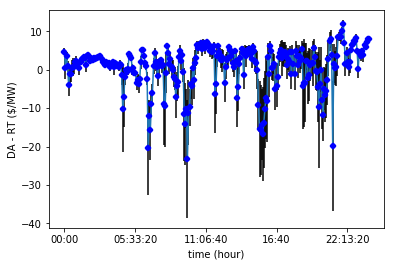

In [43]:
data1 = filled.groupby('Local Time')[['spread']].mean()

time = data1.index

data1['sem'] = filled.groupby('Local Time')[['spread']].sem()

fig, ax1 = plt.subplots()

ax1.set_xlabel('time (hour)')
ax1.set_ylabel('DA - RT ($/MW)')
ax1.plot(time, data1['spread'])
ax1.tick_params(axis='y')
ax1.errorbar(time,data1['spread'], data1['sem'],
                 marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)

In [44]:
filled['spread'].mean()

0.8624424066463615

In [45]:
filled = filler(filled, 'loc sem_DA')

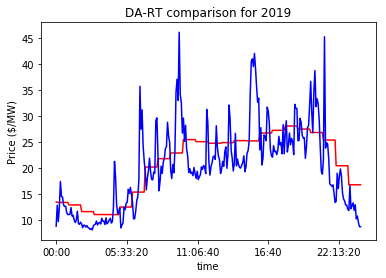

In [52]:
data1 = filled.groupby('Local Time')[['LMP_DA']].mean()
data2 = filled.groupby('Local Time')[['LMP_RT']].mean()

time = data1.index

data1['sem'] = filled.groupby('Local Time')[['LMP_DA']].sem()
data2['sem'] = filled.groupby('Local Time')[['LMP_RT']].sem()

plt.plot(time,data1['LMP_DA'],'red')
plt.plot(time,data2['LMP_RT'],'blue')

plt.ylabel('Price ($/MW)')
plt.title('DA-RT comparison for 2019')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

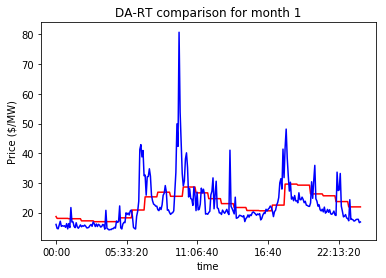

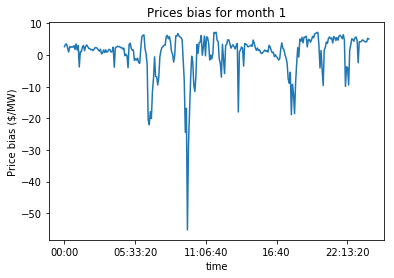

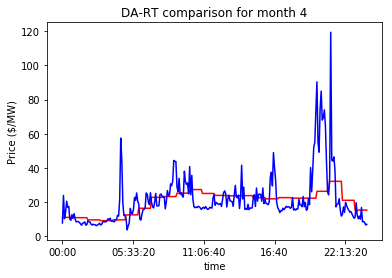

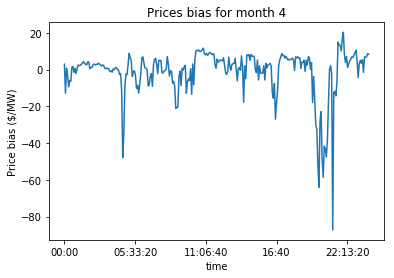

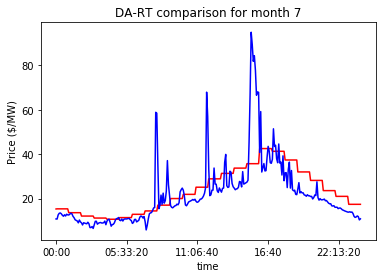

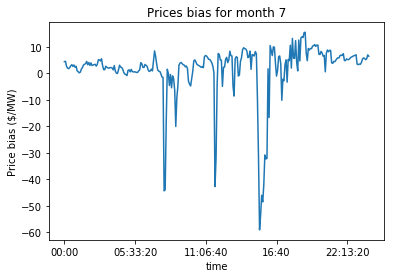

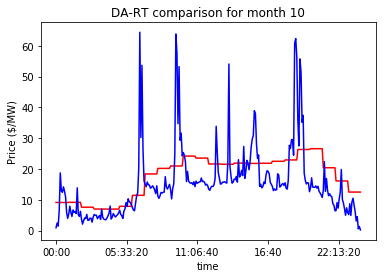

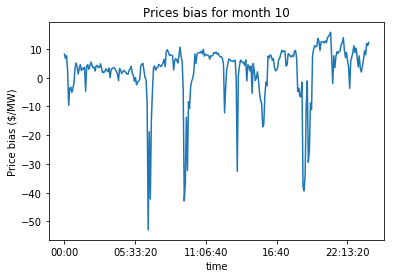

In [65]:
filled_months = filled['Local Date'].values.tolist()
months = []
for month in filled_months:
    months.append(month.month)
filled['Month'] = np.array(months)

for n in [1,4,7,10]:
    by_month = filled[filled['Month']==n]
    data1 = by_month.groupby('Local Time')[['LMP_DA']].mean()
    data2 = by_month.groupby('Local Time')[['LMP_RT']].mean()

    time = data1.index

    data1['sem'] = by_month.groupby('Local Time')[['LMP_DA']].sem()
    data2['sem'] = by_month.groupby('Local Time')[['LMP_RT']].sem()

    fig, ax1 = plt.subplots()
    
    ax1.plot(time,data1['LMP_DA'],'red')
    ax1.plot(time,data2['LMP_RT'],'blue')

    plt.ylabel('Price ($/MW)')
    plt.title('DA-RT comparison for month {}'.format(n))
    plt.show()
    
    fig, ax2 = plt.subplots()
    
    data3 = by_month.groupby('Local Time')[['spread']].mean()
    
    ax2.plot(time,data3['spread'])
    plt.ylabel('Price bias ($/MW)')
    plt.title('Prices bias for month {}'.format(n))
    plt.show()

In [73]:
by_month = filled[filled['Month']==1]
data1 = by_month.groupby('Local Time')[['LMP_DA']].mean()
data2 = by_month.groupby('Local Time')[['LMP_RT']].mean()
peaks = data2.sort_values('LMP_RT',ascending=False)


In [75]:
by_month[by_month['Local Time']==peaks.index[0]].sort_values('LMP_RT',ascending=False)

,Interval_DA,LMP_DA,loc sem_DA,Interval_RT,LMP_RT,loc sem_RT,Local Date,Local Time,Weekday,spread,Month
GMT Interval,,,,,,,,,,,
01/26/2019 15:40:00,NaN,25.478133,0.109336,01/26/2019 09:40:00,1488.522486,2.047652,2019-01-26,09:40:00,False,-1463.044353,1
01/07/2019 15:40:00,NaN,18.427603,0.126112,01/07/2019 09:40:00,306.922063,2.024762,2019-01-07,09:40:00,True,-288.494460,1
01/31/2019 15:40:00,NaN,37.779355,0.269128,01/31/2019 09:40:00,48.099093,2.353949,2019-01-31,09:40:00,True,-10.319738,1
01/23/2019 15:40:00,NaN,29.876192,0.131392,01/23/2019 09:40:00,35.147659,0.090507,2019-01-23,09:40:00,True,-5.271467,1
01/03/2019 15:40:00,NaN,32.254287,0.234107,01/03/2019 09:40:00,34.209750,0.329624,2019-01-03,09:40:00,True,-1.955463,1
01/15/2019 15:40:00,NaN,26.104329,0.077046,01/15/2019 09:40:00,33.637375,0.096014,2019-01-15,09:40:00,True,-7.533047,1
01/02/2019 15:40:00,NaN,31.062082,0.291880,01/02/2019 09:40:00,31.413970,0.053992,2019-01-02,09:40:00,True,-0.351888,1
01/14/2019 15:40:00,NaN,27.313159,0.144514,01/14/2019 09:40:00,29.157138,0.034278,2019-01-14,09:40:00,True,-1.843980,1
01/25/2019 15:40:00,NaN,32.778024,0.420262,01/25/2019 09:40:00,28.238274,0.571707,2019-01-25,09:40:00,True,4.539750,1
